## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [9]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [10]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

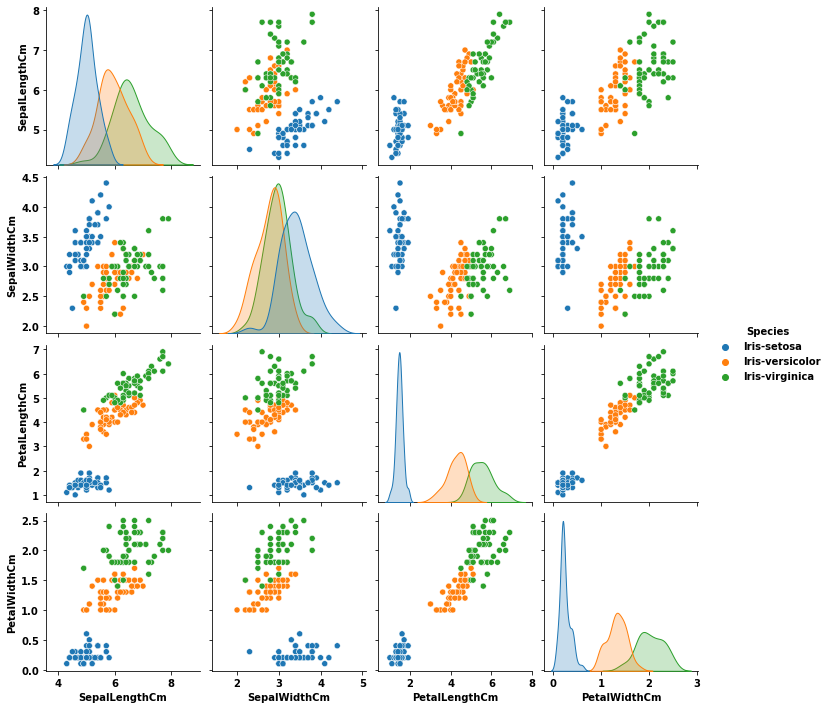

In [50]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [44]:
### Шаг 3. Обученние нейронной сети


def neuro_train(neuron_numb = 5, epoch = 3000):
# присваевание случайных весов
    
    

    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = 0.1

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epoch):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    
    return w0, w1, layer1, layer2, accuracy, errors

    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения

def print_acc(w0, w1, layer1, layer2, accuracy, errors):
    
  
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


C:\Users\Noyanlar\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Количество нейронов: 1


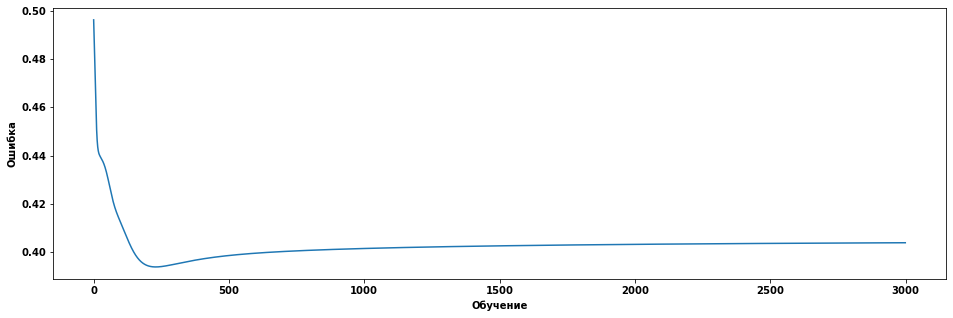

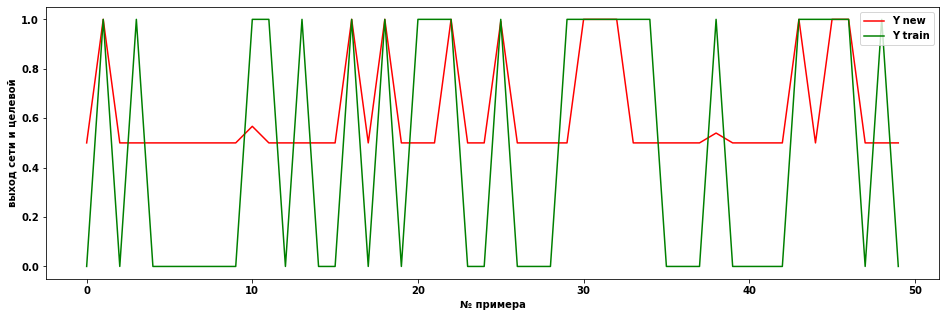

Аккуратность нейронной сети 59.62%
Количество нейронов: 2


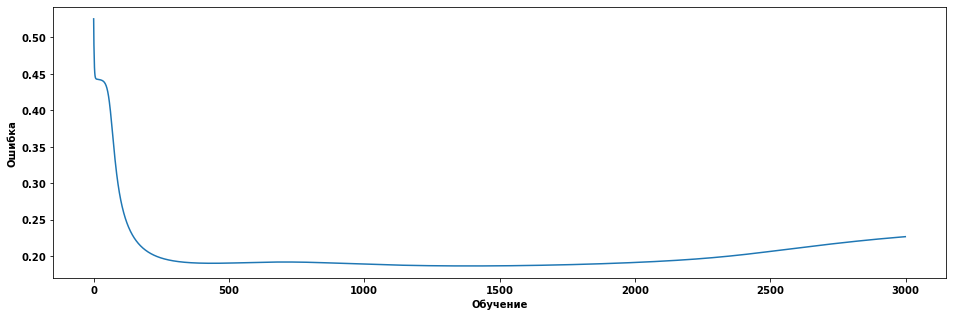

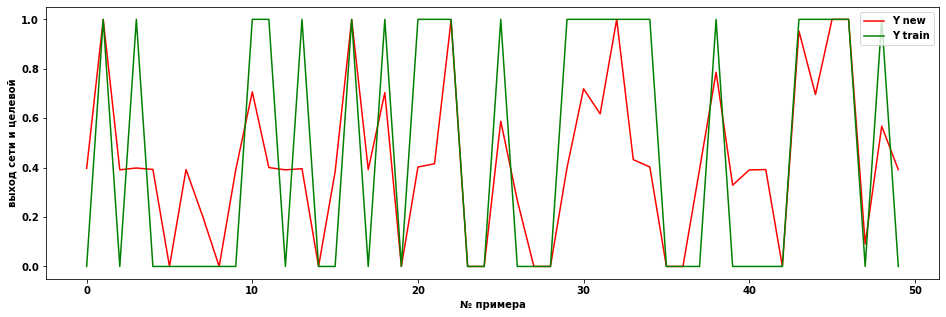

Аккуратность нейронной сети 77.31%
Количество нейронов: 3


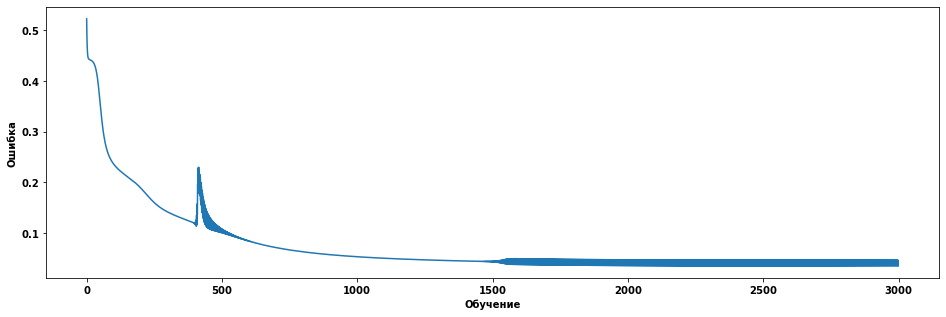

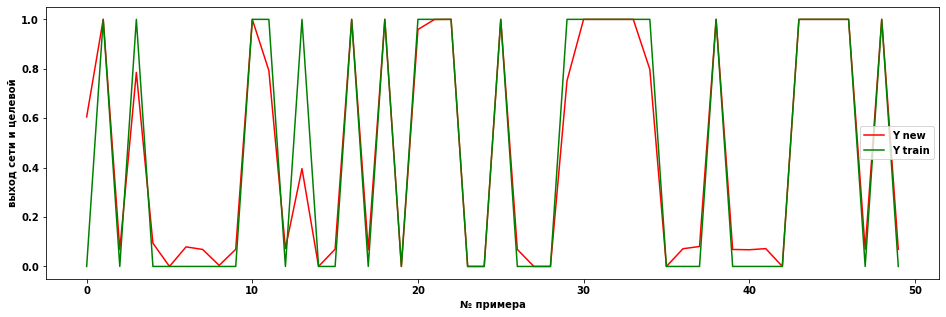

Аккуратность нейронной сети 96.44%
Количество нейронов: 5


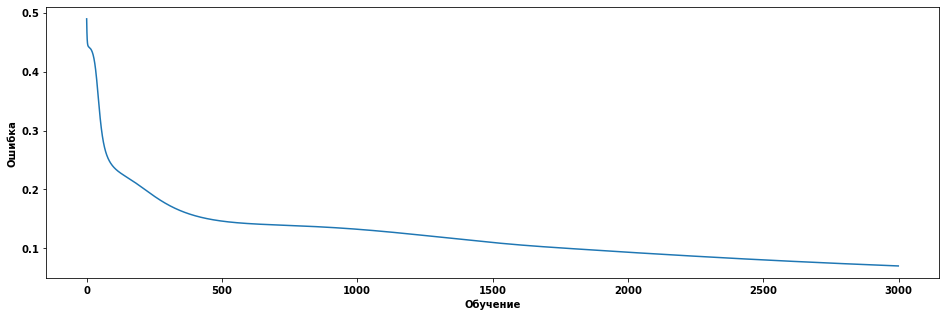

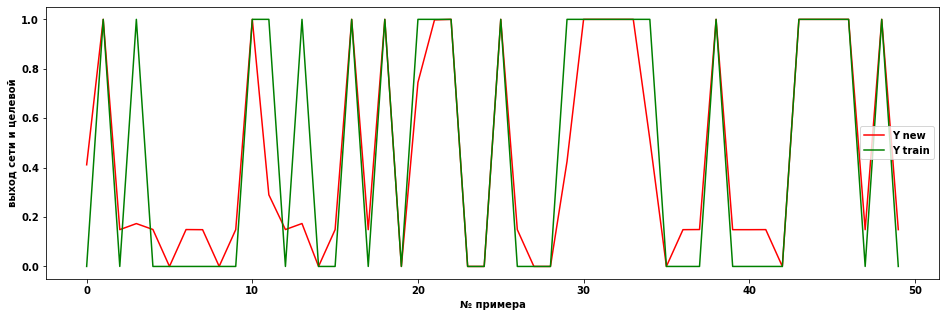

Аккуратность нейронной сети 93.01%
Количество нейронов: 7


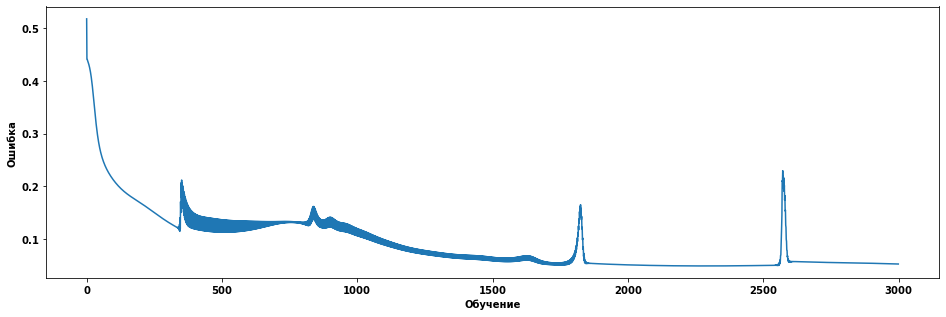

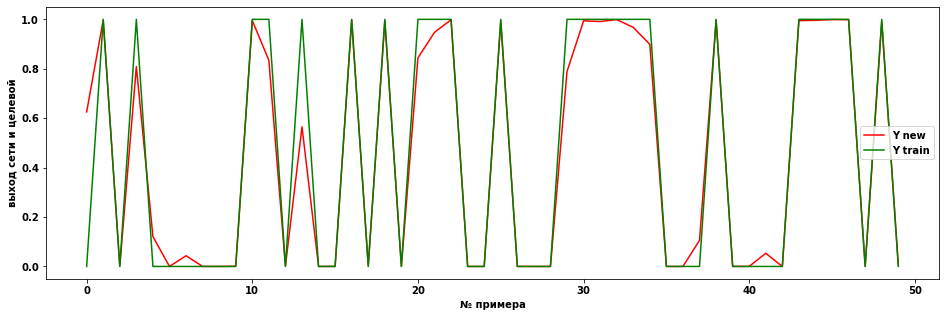

Аккуратность нейронной сети 94.76%
Количество нейронов: 9


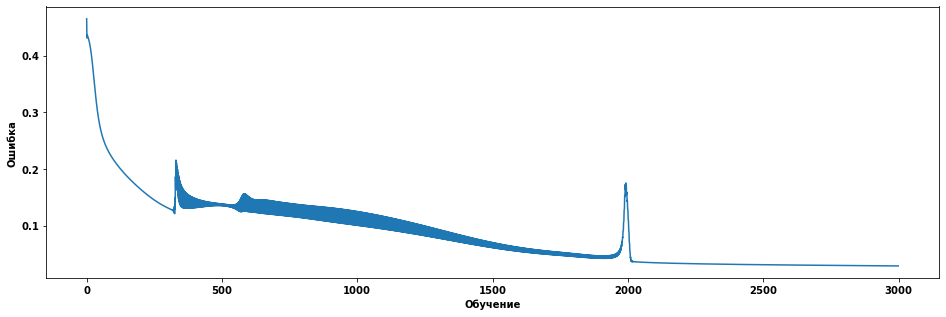

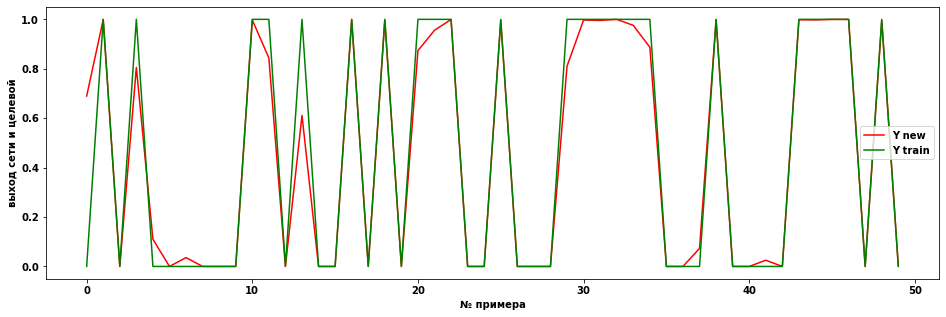

Аккуратность нейронной сети 97.09%
Количество нейронов: 10


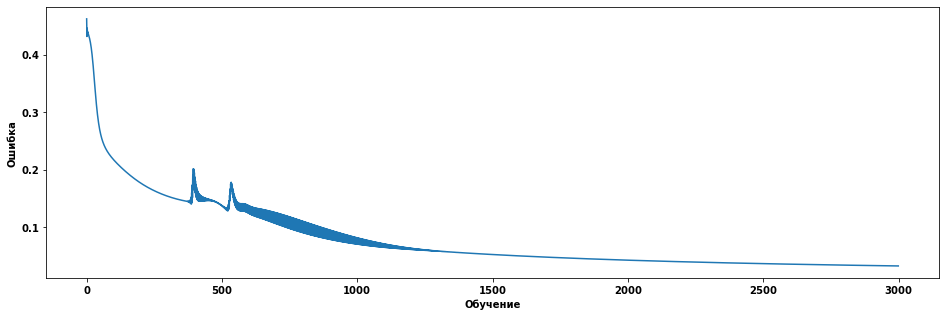

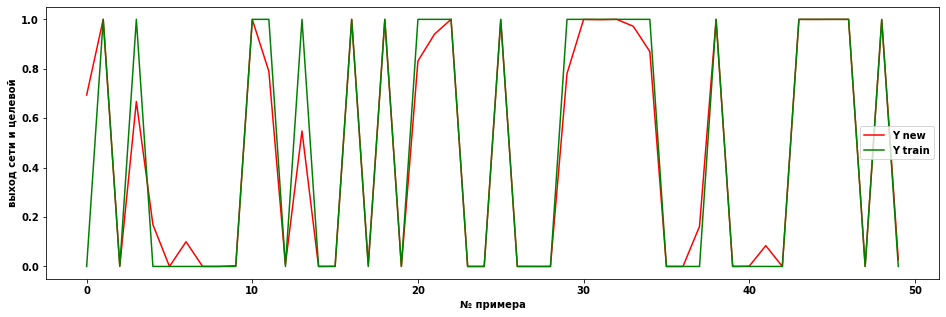

Аккуратность нейронной сети 96.79%
Количество нейронов: 15


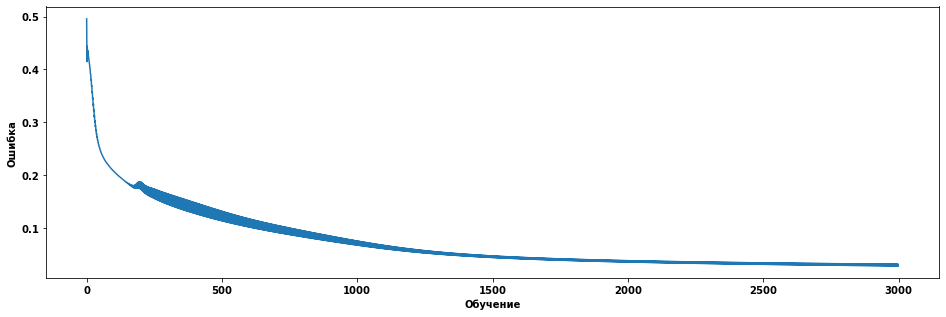

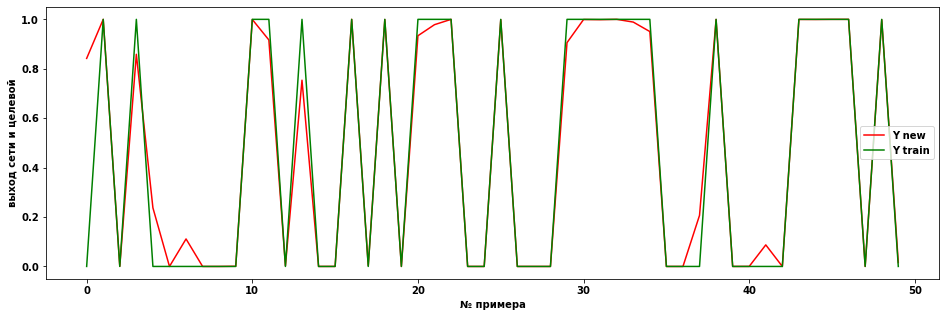

Аккуратность нейронной сети 97.21%


In [49]:
neuron_numbs = [1, 2, 3, 5, 7, 9, 10, 15]

for neuron_numb in neuron_numbs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(neuron_numb, 3000)
    print('Количество нейронов: '+ str(neuron_numb))
    print_acc(w0, w1, layer1, layer2, accuracy, errors)



In [18]:
# прямое распространение(feed forward)
def print_acc_test(w0, w1, layer1, layer2, accuracy, errors):
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t


    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
    plt.plot(y_test[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть

    # метрика модели
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

C:\Users\Noyanlar\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Количество нейронов: 1


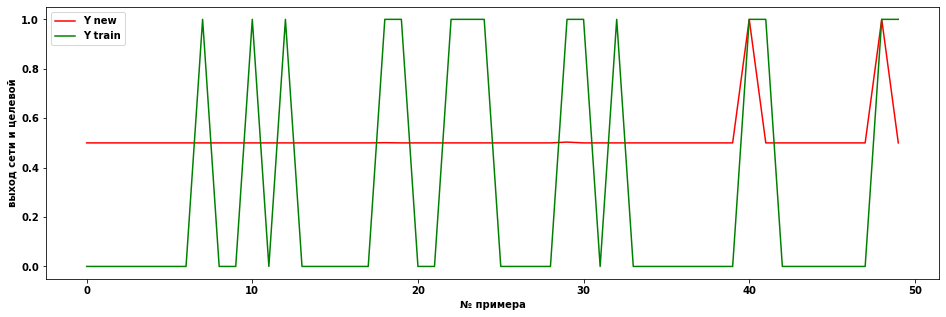

Аккуратность нейронной сети на тесте 52.01%
Количество нейронов: 2


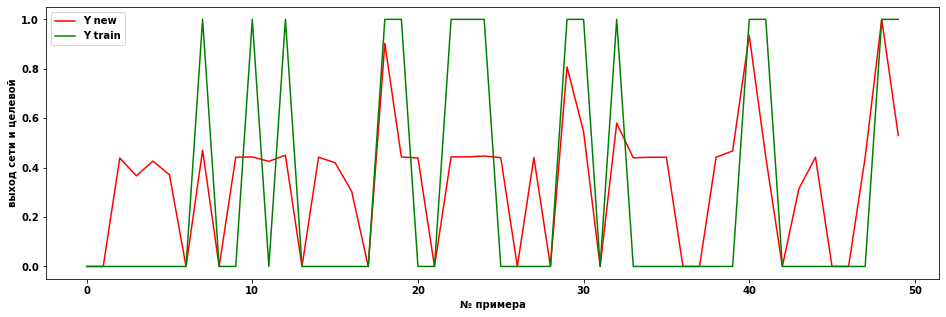

Аккуратность нейронной сети на тесте 75.8%
Количество нейронов: 3


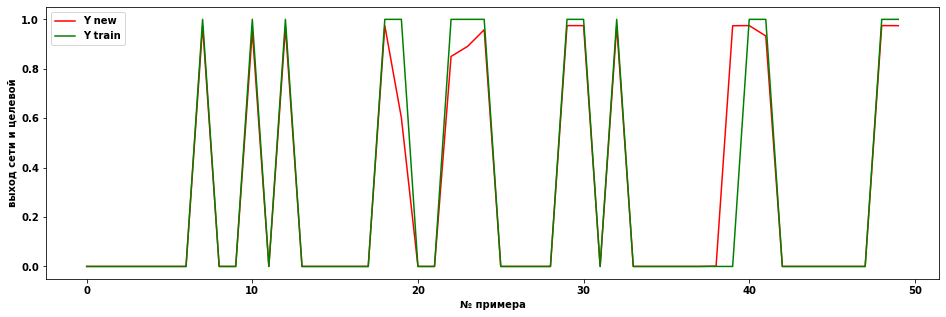

Аккуратность нейронной сети на тесте 93.98%
Количество нейронов: 5


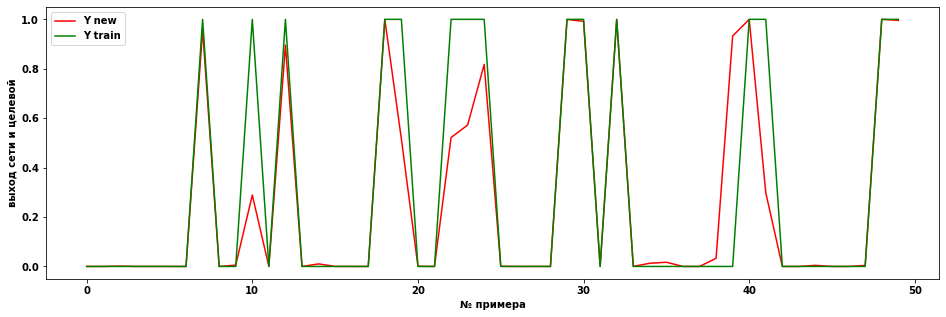

Аккуратность нейронной сети на тесте 93.87%
Количество нейронов: 7


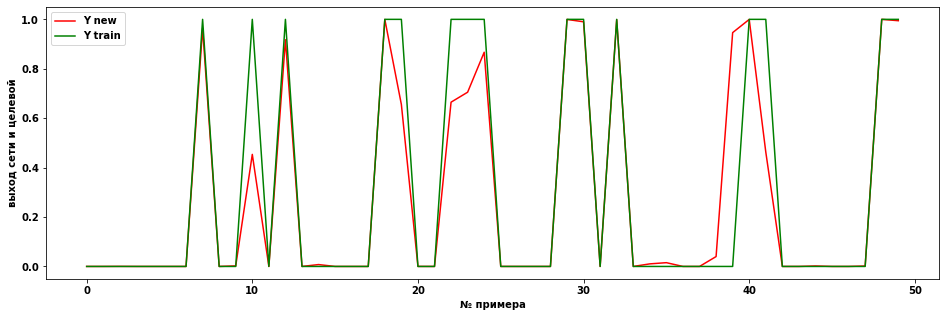

Аккуратность нейронной сети на тесте 95.19%
Количество нейронов: 9


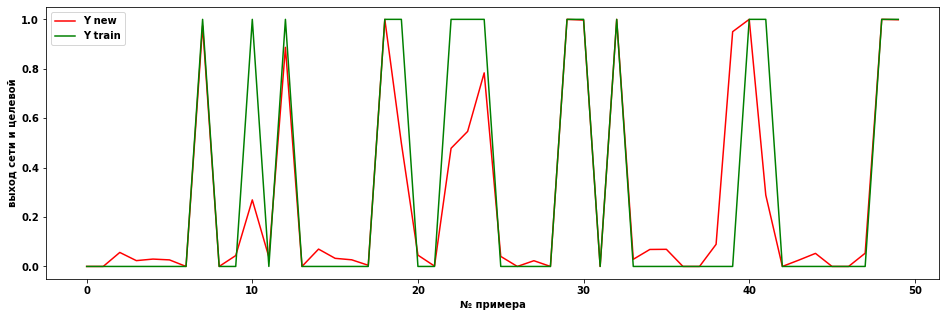

Аккуратность нейронной сети на тесте 91.25%
Количество нейронов: 10


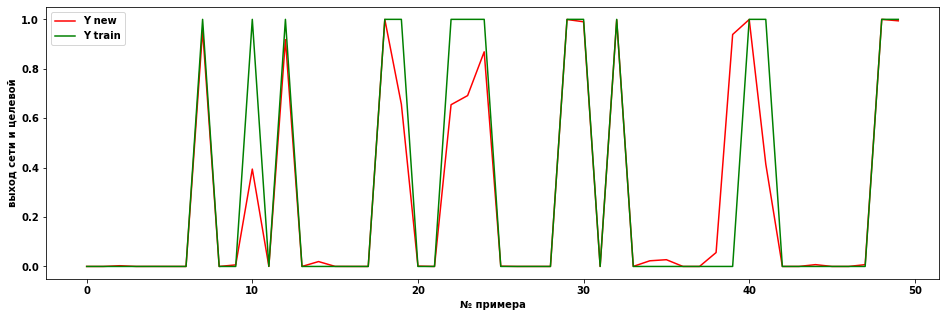

Аккуратность нейронной сети на тесте 94.46%
Количество нейронов: 15


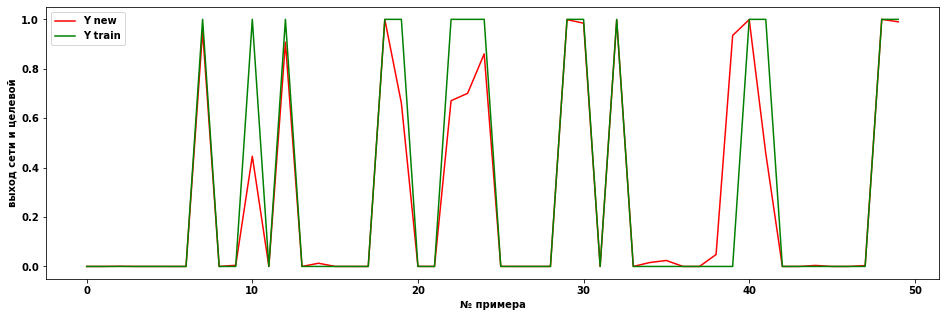

Аккуратность нейронной сети на тесте 94.83%


In [51]:
for neuron_numb in neuron_numbs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(neuron_numb, 3000)
    print('Количество нейронов: '+ str(neuron_numb))
    print_acc_test(w0, w1, layer1, layer2, accuracy, errors)

Количество эпох: 100


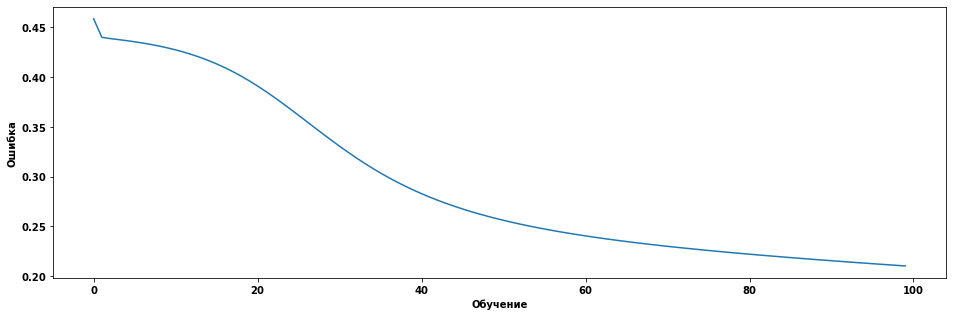

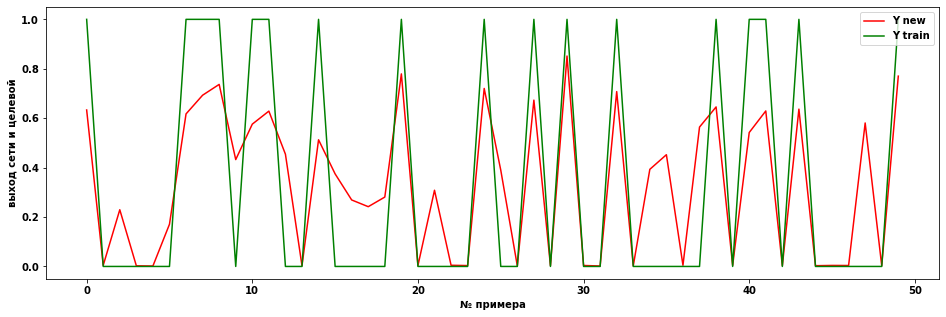

Аккуратность нейронной сети 78.99%
Количество эпох: 300


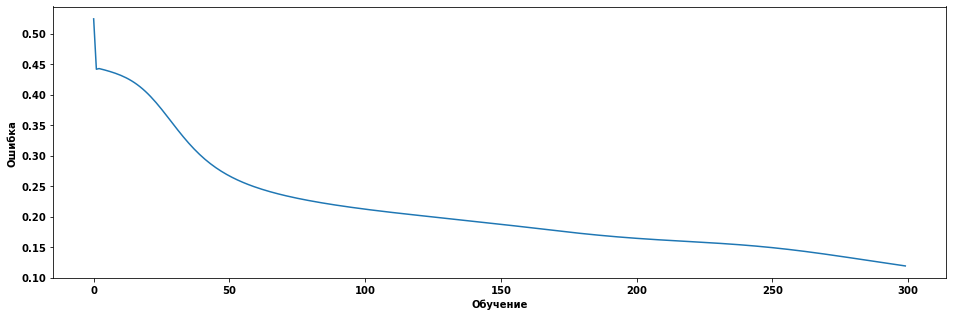

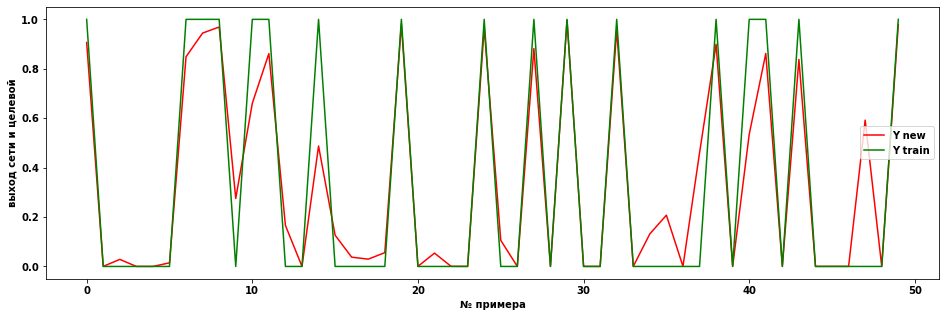

Аккуратность нейронной сети 88.1%
Количество эпох: 1000


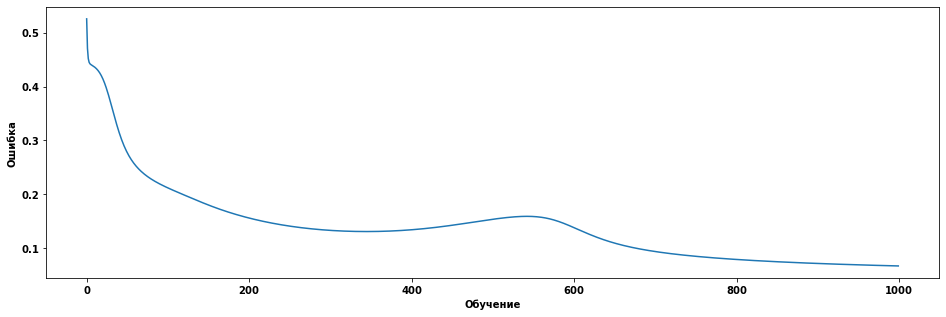

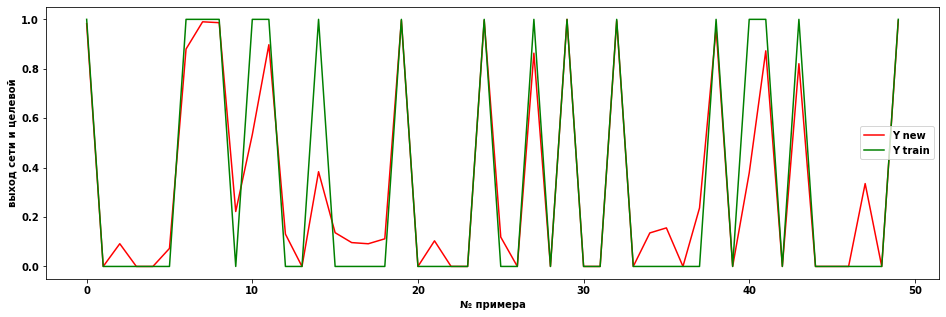

Аккуратность нейронной сети 93.35%
Количество эпох: 3000


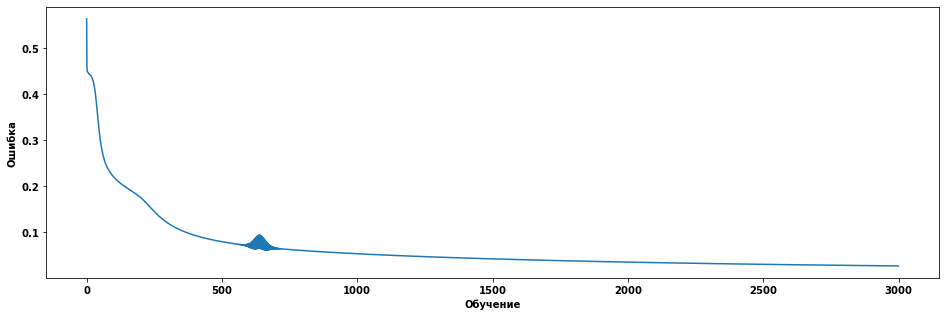

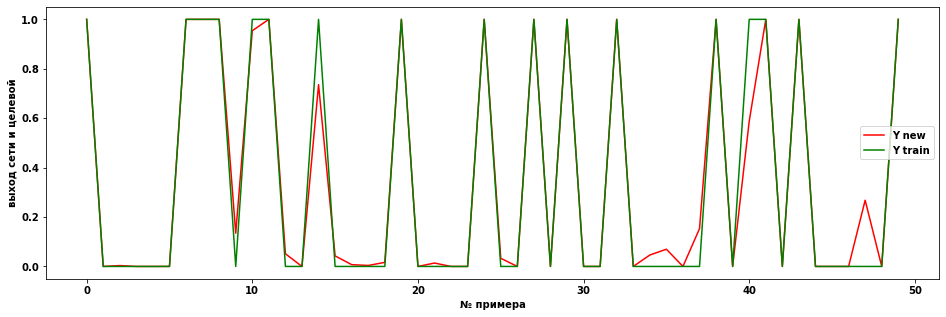

Аккуратность нейронной сети 97.3%
Количество эпох: 5000


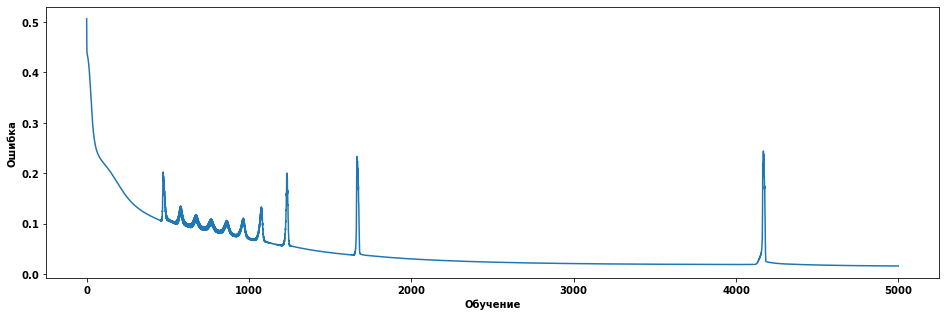

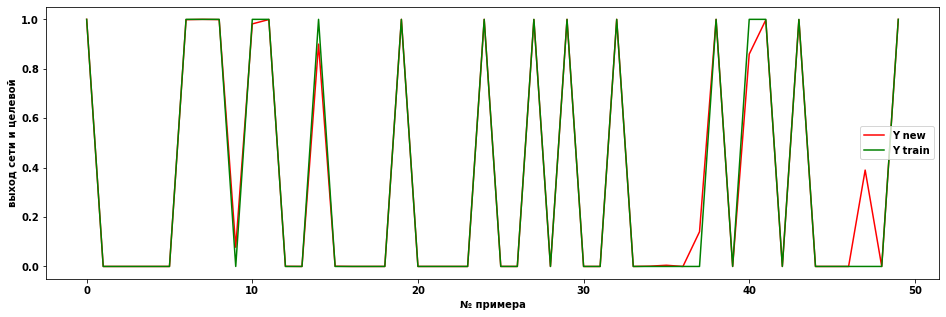

Аккуратность нейронной сети 98.36%


In [29]:
epochs = [100, 300, 1000, 3000, 5000]
for epoch in epochs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(5, epoch)
    print('Количество эпох: '+ str(epoch))
    print_acc(w0, w1, layer1, layer2, accuracy, errors)

Количество эпох: 100


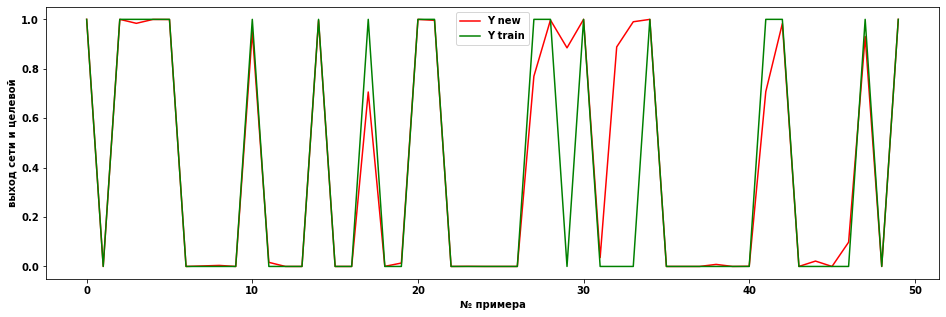

Аккуратность нейронной сети на тесте 93.79%
Количество эпох: 300


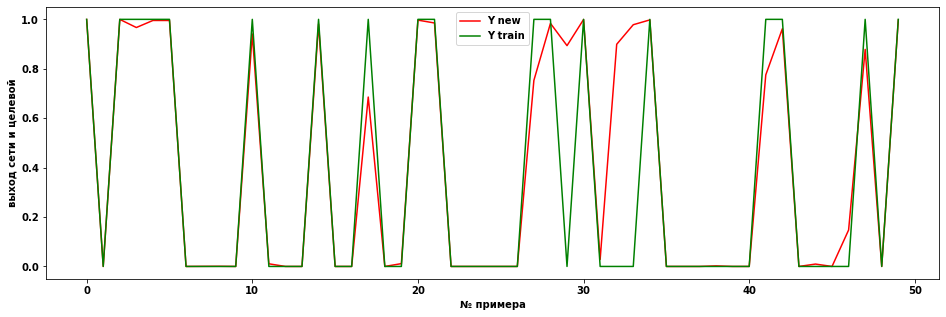

Аккуратность нейронной сети на тесте 94.29%
Количество эпох: 1000


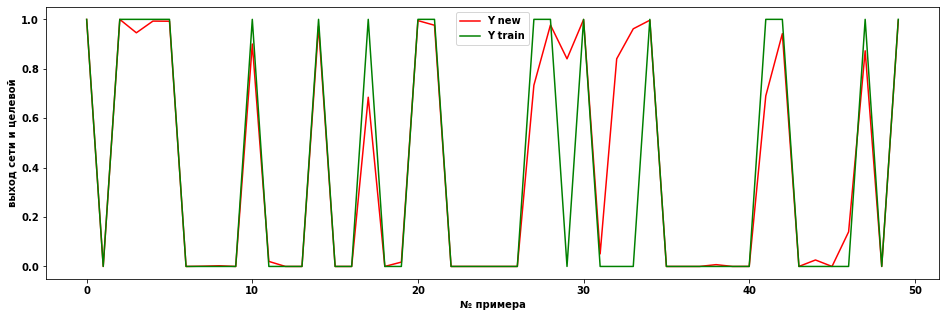

Аккуратность нейронной сети на тесте 93.89%
Количество эпох: 3000


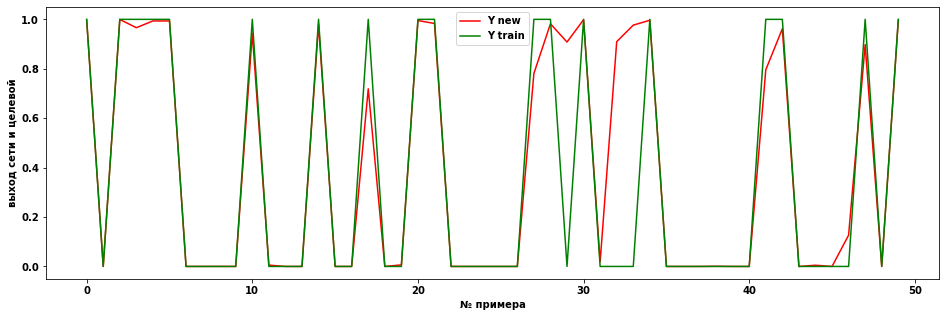

Аккуратность нейронной сети на тесте 94.33%
Количество эпох: 5000


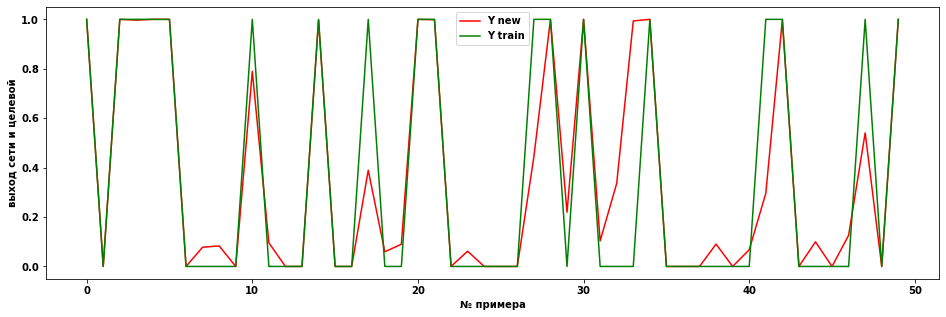

Аккуратность нейронной сети на тесте 93.12%


In [35]:
for epoch in epochs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(neuron_numb, 3000)
    print('Количество эпох: '+ str(epoch))
    print_acc_test(w0, w1, layer1, layer2, accuracy, errors)

Увеличение нейронов после 9 приводит к ухудшению точности. Увеличение количества эпох приводит к улучшению точности на трейне. Но что увеличение нейронов, что увеличение эпох приводит к переобучению, что ухудшает показатели на тесте.